# Dataset

Para o nosso trabalho escolhemos o dataset **_Water Quality_**(https://www.kaggle.com/adityakadiwal/water-potability) que o reúne os amostras de 3276 corpos de água diferentes. O dataset é composto por 10 atributos:

 <ul><li>ph: 
        <ul>
            <li>tipo inteiro</li>
            <li>Mede o nível de acidez e basicidade da água  </li>
            <li>valores entre 0 e 14 </li>
        </ul>
    </li>
    <li>Hardness: 
        <ul>
            <li>tipo ponto flutuante</li>
            <li></li>
            <li> </li>
        </ul>
    </li>
    <li>Solids: 
        <ul>
            <li>tipo ponto flutuante</li>
            <li>Quantidade de sulfatos na água  </li>
            <li>Medidos em mg/l (miligramas por litro) </li>
        </ul>
    </li>
    <li>Solids: 
        <ul>
            <li>tipo ponto flutuante</li>
            <li>Quantidade de sólidos dissolvidos  </li>
            <li>Medidos em ppm(partes por milhão)</li>
        </ul>
    </li>
    <li>Chloramines: 
        <ul>
            <li>tipo ponto flutuante</li>
            <li>Quantidade de cloraminas </li>
            <li>Medidos em ppm</li>
        </ul>
    </li>
    <li>Conductivity: 
        <ul>
            <li>tipo ponto flutuante</li>
            <li>Condutividade elétrica da água  </li>
            <li>Medida em S/cm (microsiemens por centímetro) </li>
        </ul>
    </li>
    <li>Organic_carbon: 
        <ul>
            <li>tipo ponto flutuante</li>
            <li>Mede a quantidade de carbono orgânico </li>
            <li>Medido em mg/L</li>
        </ul>
    </li>
    <li>Trihalomethanes: 
        <ul>
            <li>tipo ponto flutuante</li>
            <li>Mede a quantidade de THMs  </li>
            <li>Medidos em ppm  </li>
        </ul>
    </li>
    <li>Turbidity: 
        <ul>
            <li>tipo ponto flutuante</li>
            <li>Mede as propriedades de emissão de luz </li>
            <li>Medido em NTU </li>
        </ul>
    </li>
    <li>Potability: 
        <ul>
            <li>tipo inteiro</li>
            <li>Indica se a água é potável ou não</li>
            <li>Valores 1 ou 0 </li>
        </ul>
    </li>
    
 </ul>


# Implementação

## Imports das bibliotecas necessárias


In [240]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold

## Import do Dataset

In [241]:
# Nome das colunas
colunas = ['ph', 'hardness', 'solids', 'chloramines', 'sulfate',
           'conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity', 'potability']
# Import do csv
dataset = pd.read_csv("water_potability.csv", header=None, names=colunas)
# Limpando o Dataset
dataset = dataset.dropna()
# Separação dos atributos
X = dataset[['ph', 'hardness', 'solids', 'chloramines', 'sulfate',
             'conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity']]
Y = dataset.potability


## Tratamento do Dataset

Percebemos que no dataset tínhamos alguns valores nulos e resolvemos não usar essas instâncias dado que mesmo sem elas ainda teríamos uma quantidade satisfatória para realizarmos o aprendizado.


In [248]:
# Limpando o Dataset
dataset = dataset.dropna()
dataset.size/10

2011.0

In [242]:
kf = KFold(n_splits=10,random_state=True,shuffle=True)

In [243]:
def especificidade(matriz):
    v_N = matriz[0,1]
    N = matriz[0,1]+matriz[1,1]
    return v_N/N

In [251]:
from IPython.display import Image
from six import StringIO
import pydotplus
from sklearn.tree import export_graphviz
clf = DecisionTreeClassifier(criterion="entropy")
acuracias = []
for train, test in kf.split(X=X, y=Y):
    X_train = X.iloc[train]
    Y_train = Y.iloc[train]
    X_test = X.iloc[test]
    Y_test = Y.iloc[test]
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    acuracias.append(metrics.accuracy_score(Y_test, Y_pred))
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns, class_names=['No', 'Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('arvore1.png')
Image(graph.create_png())

    # print(especificidade(metrics.confusion_matrix(Y_test,Y_pred)))


In [245]:
def soma_array(array):
    soma = 0
    for i in array:
        soma+=i
    return soma

In [246]:
def repeat_array(item,tam):
    array = []
    for i in range(0,tam):
        array.append(item)
    return array

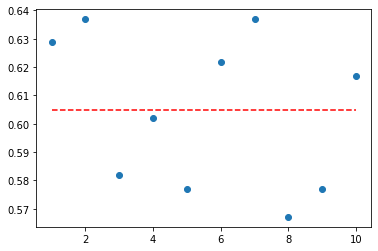

In [247]:

media  = soma_array(acuracias)/len(acuracias)
medias  = repeat_array(media,10)
plt.plot(range(1,11),medias,'r--')
plt.scatter(range(1,11),acuracias)
